In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("../data/clean/retail_clean.csv")

In [2]:
import pandas as pd
import datetime as dt

# ابتدا تبدیل به تاریخ
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# حالا snapshot_date درست است
snapshot_date = df['InvoiceDate'].max()

# ساخت RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'MonetaryValue'
}, inplace=True)

print(rfm.head())

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         325          1       77183.60
12347.0           1        182        4310.00
12348.0          74         31        1797.24
12349.0          18         73        1757.55
12350.0         309         17         334.40


In [3]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [4]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_

print(rfm['Cluster'].value_counts())

Cluster
0    2171
1    1326
3     828
2      13
Name: count, dtype: int64


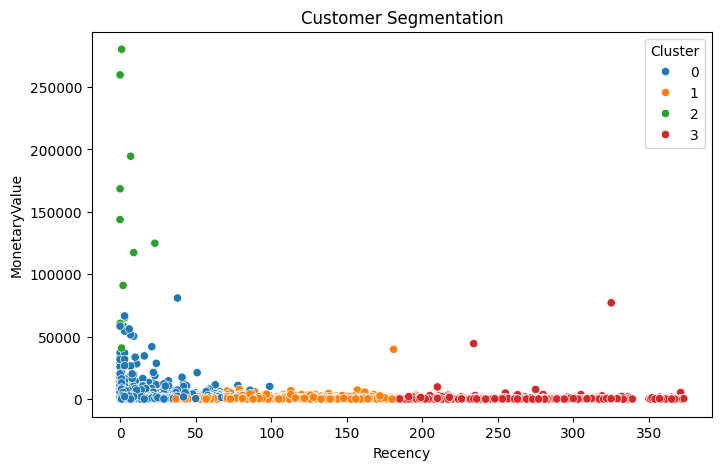

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Recency', y='MonetaryValue',
    hue='Cluster', data=rfm, palette='tab10'
)
plt.title("Customer Segmentation")
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [7]:
from sklearn.cluster import KMeans

# تعداد خوشه‌ها را می‌توان 4 انتخاب کرد (مثلاً VIP, High, Medium, Low)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# افزودن برچسب خوشه‌ها به دیتافریم
rfm['Cluster'] = kmeans.labels_

print(rfm['Cluster'].value_counts())

Cluster
0    3131
1     828
3     367
2      12
Name: count, dtype: int64


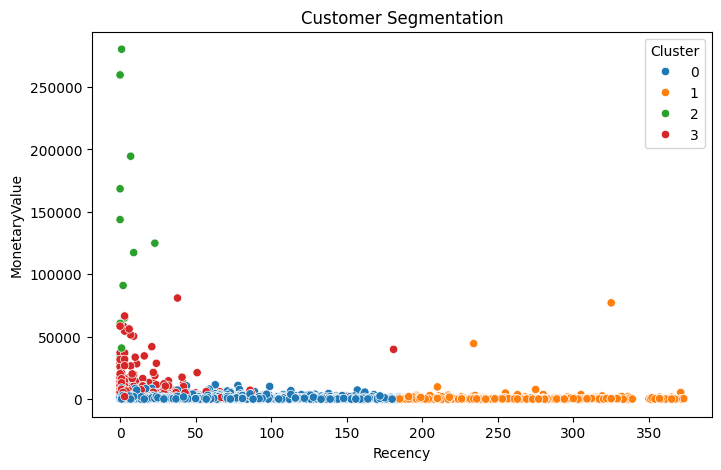

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Recency', y='MonetaryValue',
    hue='Cluster', data=rfm, palette='tab10'
)
plt.title("Customer Segmentation")
plt.show()